In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential, save_model
from tensorflow.keras.layers import Input, Embedding, Dot, Reshape, Dense, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [222]:
print("\u2022 Using TensorFlow Version:", tf.__version__)

• Using TensorFlow Version: 2.12.0


In [5]:
# Specify the file path
file_path = '/content/drive/MyDrive/capstone/ML/users_final.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)
data

,user_id,usia,jenis_kelamin,tinggi_badan,berat_badan,aktivitas_fisik,pekerjaan_mahasiswa,pekerjaan_pns,pekerjaan_polisi,pekerjaan_siswa,...,kental,digoreng,direbus,dibakar,dikukus,cepat_saji,beli,ranking,makanan,rating
0,1,21,0,0.315789,0.365385,0,1,0,0,0,...,0.333333,0.888889,0.666667,0.111111,0.222222,1,1,1,63,5.0
1,1,21,0,0.315789,0.365385,0,1,0,0,0,...,0.333333,0.888889,0.666667,0.111111,0.222222,1,1,2,4,4.8
2,1,21,0,0.315789,0.365385,0,1,0,0,0,...,0.333333,0.888889,0.666667,0.111111,0.222222,1,1,3,129,4.5
3,1,21,0,0.315789,0.365385,0,1,0,0,0,...,0.333333,0.888889,0.666667,0.111111,0.222222,1,1,4,145,4.2
4,1,21,0,0.315789,0.365385,0,1,0,0,0,...,0.333333,0.888889,0.666667,0.111111,0.222222,1,1,5,135,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,60,20,1,0.921053,0.423077,1,0,0,1,0,...,0.444444,0.777778,0.555556,0.777778,0.777778,1,1,1,5,5.0
1196,60,20,1,0.921053,0.423077,1,0,0,1,0,...,0.444444,0.777778,0.555556,0.777778,0.777778,1,1,2,6,4.8
1197,60,20,1,0.921053,0.423077,1,0,0,1,0,...,0.444444,0.777778,0.555556,0.777778,0.777778,1,1,3,172,4.5
1198,60,20,1,0.921053,0.423077,1,0,0,1,0,...,0.444444,0.777778,0.555556,0.777778,0.777778,1,1,4,169,4.2


# 2. Feature Engineering

# *2.1 Separate data based on Meal Time*

In [6]:
# Split the data based on meal time
breakfast_data = data[data['waktu_makan'] == 'sarapan'].copy()
lunch_data = data[data['waktu_makan'] == 'makansiang'].copy()
dinner_data = data[data['waktu_makan'] == 'makanmalam'].copy()
snack_data = data[data['waktu_makan'] == 'snack'].copy()

In [7]:
print("breakfast data:", breakfast_data.shape)
print("lunch data:", lunch_data.shape)
print("dinner data:", dinner_data.shape)
print("snack data:", snack_data.shape)

breakfast data: (300, 33)
lunch data: (300, 33)
dinner data: (300, 33)
snack data: (300, 33)


In [226]:
lunch_data

,user_id,usia,jenis_kelamin,tinggi_badan,berat_badan,aktivitas_fisik,pekerjaan_mahasiswa,pekerjaan_pns,pekerjaan_polisi,pekerjaan_siswa,...,kental,digoreng,direbus,dibakar,dikukus,cepat_saji,beli,ranking,makanan,rating
5,1,21,0,0.315789,0.365385,0,1,0,0,0,...,0.444444,1.000000,0.333333,0.222222,0.000000,1,1,1,58,5.0
6,1,21,0,0.315789,0.365385,0,1,0,0,0,...,0.444444,1.000000,0.333333,0.222222,0.000000,1,1,2,103,4.8
7,1,21,0,0.315789,0.365385,0,1,0,0,0,...,0.444444,1.000000,0.333333,0.222222,0.000000,1,1,3,60,4.5
8,1,21,0,0.315789,0.365385,0,1,0,0,0,...,0.444444,1.000000,0.333333,0.222222,0.000000,1,1,4,115,4.2
9,1,21,0,0.315789,0.365385,0,1,0,0,0,...,0.444444,1.000000,0.333333,0.222222,0.000000,1,1,5,63,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,60,20,1,0.921053,0.423077,1,0,0,1,0,...,0.333333,0.666667,0.111111,0.777778,0.222222,1,1,1,62,5.0
1186,60,20,1,0.921053,0.423077,1,0,0,1,0,...,0.333333,0.666667,0.111111,0.777778,0.222222,1,1,2,83,4.8
1187,60,20,1,0.921053,0.423077,1,0,0,1,0,...,0.333333,0.666667,0.111111,0.777778,0.222222,1,1,3,113,4.5
1188,60,20,1,0.921053,0.423077,1,0,0,1,0,...,0.333333,0.666667,0.111111,0.777778,0.222222,1,1,4,71,4.2


In [227]:
breakfast_data

,user_id,usia,jenis_kelamin,tinggi_badan,berat_badan,aktivitas_fisik,pekerjaan_mahasiswa,pekerjaan_pns,pekerjaan_polisi,pekerjaan_siswa,...,kental,digoreng,direbus,dibakar,dikukus,cepat_saji,beli,ranking,makanan,rating
10,1,21,0,0.315789,0.365385,0,1,0,0,0,...,0.111111,0.888889,0.222222,0.333333,0.0,1,1,1,20,5.0
11,1,21,0,0.315789,0.365385,0,1,0,0,0,...,0.111111,0.888889,0.222222,0.333333,0.0,1,1,2,20,4.8
12,1,21,0,0.315789,0.365385,0,1,0,0,0,...,0.111111,0.888889,0.222222,0.333333,0.0,1,1,3,129,4.5
13,1,21,0,0.315789,0.365385,0,1,0,0,0,...,0.111111,0.888889,0.222222,0.333333,0.0,1,1,4,135,4.2
14,1,21,0,0.315789,0.365385,0,1,0,0,0,...,0.111111,0.888889,0.222222,0.333333,0.0,1,1,5,63,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,60,20,1,0.921053,0.423077,1,0,0,1,0,...,0.333333,0.777778,0.666667,0.111111,0.0,1,1,1,115,5.0
1191,60,20,1,0.921053,0.423077,1,0,0,1,0,...,0.333333,0.777778,0.666667,0.111111,0.0,1,1,2,163,4.8
1192,60,20,1,0.921053,0.423077,1,0,0,1,0,...,0.333333,0.777778,0.666667,0.111111,0.0,1,1,3,135,4.5
1193,60,20,1,0.921053,0.423077,1,0,0,1,0,...,0.333333,0.777778,0.666667,0.111111,0.0,1,1,4,103,4.2


# 2.2 Creating User-Item Matrix

In [8]:
# Create a mapping for user IDs
user_ids = np.unique(data['user_id'])
user_id_map = {user_id: idx for idx, user_id in enumerate(user_ids)}

# Create a mapping for items for each meal time
meal_times = ['breakfast', 'lunch', 'dinner', 'snack']
item_maps = {}

for meal_time, data in zip(meal_times, [breakfast_data, lunch_data, dinner_data, snack_data]):
    items = np.arange(0, 175)  # Adjust the range based on the total number of food items
    item_map = {item: idx for idx, item in enumerate(items)}
    item_maps[meal_time] = item_map

# Calculate the dimensions of the user-item matrices
num_users = len(user_ids)
num_items = max(len(item_map) for item_map in item_maps.values())

# Initialize the user-item matrices for each meal time
user_item_matrices = {meal_time: np.zeros((num_users, num_items)) for meal_time in meal_times}

# Fill in the user-item matrices with ratings for each meal time
for meal_time, data in zip(meal_times, [breakfast_data, lunch_data, dinner_data, snack_data]):
    item_map = item_maps[meal_time]

    for _, row in data.iterrows():
        user_id = row['user_id']
        item = row['makanan']
        rating = row['rating']
        user_idx = user_id_map[user_id]
        item_idx = item_map[item]
        user_item_matrices[meal_time][user_idx, item_idx] = rating

In [9]:
user_item_matrices

{'breakfast': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'lunch': array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        ...,
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 5. , 4.8, ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ]]),
 'dinner': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'snack': array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        ...,
        [0. , 0. , 0. , ...,

In [10]:
user_item_matrices['lunch'][0,63]

4.0

# 2.3 Matrix Factorization

In [12]:
# !pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3095455 sha256=32a81583ac6e7a35fcf7349e672df2cd33e98ec9df6d7200562a3659e9e9089d
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [13]:
from surprise import Dataset, Reader, SVD
# Create a Surprise-compatible user-item dataset
user_item_data = []
for meal_time in meal_times:
    user_item_matrix = user_item_matrices[meal_time]
    for user_idx in range(num_users):
        for item_idx in range(num_items):
            rating = user_item_matrix[user_idx, item_idx]
            if rating != 0:
                user_id = list(user_id_map.keys())[list(user_id_map.values()).index(user_idx)]
                item = list(item_map.keys())[list(item_map.values()).index(item_idx)]
                user_item_data.append((user_id, item, rating))

    # Define the Reader object to parse the dataset
    reader = Reader(rating_scale=(1, 5))

    # Load the user-item data into Surprise Dataset
    data = Dataset.load_from_df(pd.DataFrame(user_item_data, columns=['user_id', 'item_id', 'rating']), reader)

    # Create an instance of the SVD algorithm
    svd = SVD()

    # Train the model on the user-item data
    trainset = data.build_full_trainset()
    svd.fit(trainset)

    # Get the estimated ratings for all users and items
    estimated_ratings = np.zeros((num_users, num_items))
    for user_idx in range(num_users):
        for item_idx in range(num_items):
            user_id = list(user_id_map.keys())[list(user_id_map.values()).index(user_idx)]
            item = list(item_map.keys())[list(item_map.values()).index(item_idx)]
            estimated_ratings[user_idx, item_idx] = svd.predict(user_id, item).est
    # Update the user-item matrix for the current meal time with the estimated ratings
    user_item_matrices[meal_time] = np.round(estimated_ratings,decimals=2 )


In [14]:
# Print the completed user-item matrices for each meal time
for meal_time in meal_times:
    print(f"Completed User-Item Matrix for {meal_time}:")
    print(user_item_matrices[meal_time])

Completed User-Item Matrix for breakfast:
[[4.46 4.46 4.35 ... 4.46 4.46 4.46]
 [4.49 4.49 4.46 ... 4.49 4.49 4.49]
 [4.51 4.51 4.23 ... 4.51 4.51 4.51]
 ...
 [4.51 4.51 4.37 ... 4.51 4.51 4.51]
 [4.5  4.5  4.48 ... 4.5  4.5  4.5 ]
 [4.52 4.52 4.73 ... 4.52 4.52 4.52]]
Completed User-Item Matrix for lunch:
[[4.47 4.5  4.46 ... 4.45 4.47 4.62]
 [4.49 4.43 4.5  ... 4.35 4.49 4.41]
 [4.51 4.53 4.51 ... 4.46 4.51 4.47]
 ...
 [4.48 4.57 4.52 ... 4.56 4.48 4.55]
 [4.51 4.74 4.65 ... 4.5  4.51 4.44]
 [4.49 4.64 4.52 ... 4.75 4.49 4.55]]
Completed User-Item Matrix for dinner:
[[4.48 4.7  4.45 ... 4.47 4.44 4.6 ]
 [4.5  4.66 4.57 ... 4.45 4.33 4.59]
 [4.47 4.64 4.69 ... 4.37 4.59 4.44]
 ...
 [4.49 4.66 4.49 ... 4.46 4.6  4.53]
 [4.49 4.56 4.58 ... 4.53 4.45 4.51]
 [4.49 4.51 4.45 ... 4.59 4.52 4.57]]
Completed User-Item Matrix for snack:
[[4.46 4.64 4.5  ... 4.59 4.47 4.5 ]
 [4.51 4.63 4.62 ... 4.54 4.4  4.37]
 [4.48 4.68 4.6  ... 4.41 4.55 4.46]
 ...
 [4.5  4.75 4.51 ... 4.69 4.54 4.29]
 [4.48

In [15]:
# Calculate RMSE for each meal time
for meal_time in meal_times:
    user_item_matrix = user_item_matrices[meal_time]

    # Create a list to store the original and estimated ratings
    original_ratings = []
    estimated_ratings = []

    for user_idx in range(num_users):
        for item_idx in range(num_items):
            rating = user_item_matrix[user_idx, item_idx]
            if rating != 0:
                user_id = list(user_id_map.keys())[list(user_id_map.values()).index(user_idx)]
                item = list(item_map.keys())[list(item_map.values()).index(item_idx)]
                original_ratings.append(rating)
                estimated_rating = svd.predict(user_id, item).est
                estimated_ratings.append(estimated_rating)

    # Calculate RMSE
    rmse = math.sqrt(mean_squared_error(original_ratings, estimated_ratings))
    print(f"RMSE for {meal_time}: {rmse}")

RMSE for breakfast: 0.13662742289704574
RMSE for lunch: 0.13594429761716934
RMSE for dinner: 0.13509097308480236
RMSE for snack: 0.0029010514179563414


# 3. Modeling

# *3.1 Define X*

In [16]:
#Define the X

X = {}

# Create X matrix for each meal time
X['breakfast'] = breakfast_data.drop(columns=["user_id","makanan","rating","ranking",'waktu_makan']).drop_duplicates().copy()
X['lunch'] = lunch_data.drop(columns=["user_id","makanan","rating","ranking",'waktu_makan']).drop_duplicates().copy()
X['dinner'] = dinner_data.drop(columns=["user_id","makanan","rating","ranking",'waktu_makan']).drop_duplicates().copy()
X['snack'] = snack_data.drop(columns=["user_id","makanan","rating","ranking",'waktu_makan']).drop_duplicates().copy()

In [17]:
X['breakfast'].head()

,usia,jenis_kelamin,tinggi_badan,berat_badan,aktivitas_fisik,pekerjaan_mahasiswa,pekerjaan_pns,pekerjaan_polisi,pekerjaan_siswa,pekerjaan_staff,...,renyah,halus,creamy,kental,digoreng,direbus,dibakar,dikukus,cepat_saji,beli
10,21,0,0.315789,0.365385,0,1,0,0,0,0,...,1.000000,0.444444,0.222222,0.111111,0.888889,0.222222,0.333333,0.000000,1,1
30,22,1,0.736842,0.326923,0,1,0,0,0,0,...,0.666667,0.444444,0.000000,0.000000,0.444444,0.444444,0.444444,0.777778,1,1
50,20,0,0.421053,0.384615,0,1,0,0,0,0,...,0.555556,0.333333,0.333333,0.333333,0.555556,0.555556,0.666667,0.555556,1,1
70,20,0,0.342105,0.153846,0,1,0,0,0,0,...,0.666667,0.333333,0.111111,0.222222,1.000000,0.444444,0.222222,0.444444,1,0
90,20,0,0.421053,0.076923,0,1,0,0,0,0,...,0.555556,0.444444,0.444444,0.333333,0.666667,0.666667,0.555556,0.444444,1,0


In [18]:
X['snack'].head()

,usia,jenis_kelamin,tinggi_badan,berat_badan,aktivitas_fisik,pekerjaan_mahasiswa,pekerjaan_pns,pekerjaan_polisi,pekerjaan_siswa,pekerjaan_staff,...,renyah,halus,creamy,kental,digoreng,direbus,dibakar,dikukus,cepat_saji,beli
15,21,0,0.315789,0.365385,0,1,0,0,0,0,...,0.777778,0.444444,0.222222,0.111111,0.888889,0.555556,0.111111,0.333333,1,1
35,22,1,0.736842,0.326923,0,1,0,0,0,0,...,0.777778,0.333333,0.000000,0.000000,0.777778,0.000000,0.000000,0.888889,0,1
55,20,0,0.421053,0.384615,0,1,0,0,0,0,...,0.666667,0.333333,0.222222,0.222222,0.555556,0.444444,0.333333,0.444444,1,1
75,20,0,0.342105,0.153846,0,1,0,0,0,0,...,1.000000,0.000000,0.000000,0.000000,0.444444,0.333333,0.000000,0.444444,0,1
95,20,0,0.421053,0.076923,0,1,0,0,0,0,...,0.888889,0.555556,0.333333,0.444444,0.666667,0.111111,0.111111,0.111111,1,1


In [239]:
X['snack'].columns

Index(['usia', 'jenis_kelamin', 'tinggi_badan', 'berat_badan',
       'aktivitas_fisik', 'pekerjaan_mahasiswa', 'pekerjaan_pns',
       'pekerjaan_polisi', 'pekerjaan_siswa', 'pekerjaan_staff',
       'pekerjaan_wirausaha', 'harga_minimal', 'harga_maksimal', 'asin',
       'manis', 'asam', 'gurih', 'pedas', 'renyah', 'halus', 'creamy',
       'kental', 'digoreng', 'direbus', 'dibakar', 'dikukus', 'cepat_saji',
       'beli'],
      dtype='object')

# *3.2 Define y*

In [19]:
#Define the y
y = {}

# Define y as a matrix for each meal time
for meal_time in meal_times:
    user_item_matrix = user_item_matrices[meal_time]
    y[meal_time] = user_item_matrix

In [241]:
y

{'breakfast': array([[4.45, 4.45, 4.41, ..., 4.45, 4.45, 4.45],
        [4.5 , 4.5 , 4.45, ..., 4.5 , 4.5 , 4.5 ],
        [4.49, 4.49, 4.53, ..., 4.49, 4.49, 4.49],
        ...,
        [4.49, 4.49, 4.51, ..., 4.49, 4.49, 4.49],
        [4.49, 4.49, 4.46, ..., 4.49, 4.49, 4.49],
        [4.48, 4.48, 4.5 , ..., 4.48, 4.48, 4.48]]),
 'lunch': array([[4.49, 4.49, 4.53, ..., 4.4 , 4.49, 4.5 ],
        [4.53, 4.42, 4.45, ..., 4.84, 4.53, 4.36],
        [4.5 , 4.69, 4.58, ..., 4.68, 4.5 , 4.38],
        ...,
        [4.5 , 4.61, 4.69, ..., 4.47, 4.5 , 4.42],
        [4.54, 4.62, 4.42, ..., 4.51, 4.54, 4.8 ],
        [4.48, 4.7 , 4.65, ..., 4.56, 4.48, 4.49]]),
 'dinner': array([[4.49, 4.72, 4.42, ..., 4.43, 4.45, 4.53],
        [4.53, 4.41, 4.34, ..., 4.68, 4.5 , 4.44],
        [4.48, 4.58, 4.49, ..., 4.69, 4.34, 4.38],
        ...,
        [4.49, 4.46, 4.42, ..., 4.35, 4.46, 4.71],
        [4.49, 4.73, 4.53, ..., 4.54, 4.46, 4.58],
        [4.54, 4.61, 4.57, ..., 4.64, 4.51, 4.63]]),
 'sna

# *3.3 Split Training and Testing Set*

In [20]:
X_train_dict = {}
X_test_dict = {}
y_train_dict = {}
y_test_dict = {}

for meal_time in meal_times:
    X_meal = X[meal_time]
    y_meal = y[meal_time]
    X_train_dict[meal_time], X_test_dict[meal_time], y_train_dict[meal_time], y_test_dict[meal_time] = train_test_split(X_meal, y_meal, test_size=0.3, random_state=40) 
    
    print("Meal Time:", meal_time)
    print("X_train_" + meal_time + " shape:", X_train_dict[meal_time].shape)
    print("y_train_" + meal_time + " shape:", y_train_dict[meal_time].shape)
    print("X_test_" + meal_time + " shape:", X_test_dict[meal_time].shape)
    print("y_test_" + meal_time + " shape:", y_test_dict[meal_time].shape)
    print("-------------------")

Meal Time: breakfast
X_train_breakfast shape: (42, 28)
y_train_breakfast shape: (42, 175)
X_test_breakfast shape: (18, 28)
y_test_breakfast shape: (18, 175)
-------------------
Meal Time: lunch
X_train_lunch shape: (42, 28)
y_train_lunch shape: (42, 175)
X_test_lunch shape: (18, 28)
y_test_lunch shape: (18, 175)
-------------------
Meal Time: dinner
X_train_dinner shape: (42, 28)
y_train_dinner shape: (42, 175)
X_test_dinner shape: (18, 28)
y_test_dinner shape: (18, 175)
-------------------
Meal Time: snack
X_train_snack shape: (42, 28)
y_train_snack shape: (42, 175)
X_test_snack shape: (18, 28)
y_test_snack shape: (18, 175)
-------------------


In [243]:
meal_times

['breakfast', 'lunch', 'dinner', 'snack']

# *3.4 Modeling*

In [24]:
# Hyperparameters
HIDDEN_UNITS = 50
DROPOUT_RATE = 0.2
LEARNING_RATE = 0.01
BATCH_SIZE = 32
EPOCHS = 1000
EARLY_STOPPING_PATIENCE = 5
INPUT_LENGTH = 28
REGULARIZATION_RATE=0.001

In [25]:
# Function to create and compile the model
def create_model(X_train, y_train):
    model = Sequential([
        tf.keras.layers.Dense(HIDDEN_UNITS, activation='relu', input_shape=(INPUT_LENGTH,),
                              kernel_regularizer=regularizers.l2(REGULARIZATION_RATE)),
        tf.keras.layers.Dropout(DROPOUT_RATE),
        tf.keras.layers.Dense(units=8, activation='relu',
                              kernel_regularizer=regularizers.l2(REGULARIZATION_RATE)),
        tf.keras.layers.Dense(y_train.shape[1], activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=LEARNING_RATE), loss='mean_squared_error')
    return model

# Function to print model summary
def print_model_summary(model, meal_time):
    print(f"Model Summary for {meal_time}")
    model.summary()

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=EARLY_STOPPING_PATIENCE)]

# Function to train the model
def train_model(model, X_train, y_train, X_test, y_test):
    history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test, y_test), callbacks=callbacks)
    return history

#Function to evaluate model
def evaluate_model(model, X_test, y_test):
    predicted_ratings = model.predict(X_test)
    mae = mean_absolute_error(y_test, predicted_ratings)
    rmse = np.sqrt(mean_squared_error(y_test, predicted_ratings))
    return mae, rmse, predicted_ratings 

def evaluate_and_plot_model(model, history, X_test, y_test, meal_time):
    mae, rmse, predicted_ratings = evaluate_model(model, X_test, y_test)

    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model loss for ' + meal_time)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.show()

    print(f"Metrics for {meal_time}:")
    print("MAE :", mae)
    print("RMSE :", rmse)

    return mae, rmse

Model Summary for breakfast
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                1450      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 408       
                                                                 
 dense_5 (Dense)             (None, 175)               1575      
                                                                 
Total params: 3,433
Trainable params: 3,433
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
2/2 [==============================] - 1s 218ms/step - loss: 20.0108 - val_loss: 18.1840
Epoch 2/1000
2/2 [==============================] - 0s

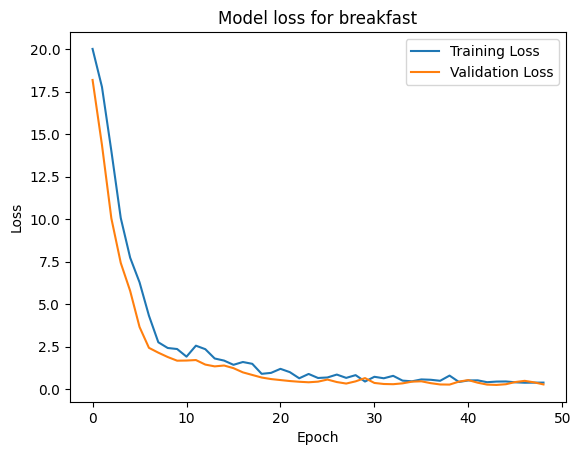

Metrics for breakfast:
MAE : 0.39188809579818973
RMSE : 0.4849310419669531


In [27]:
meal_time='breakfast'
model = create_model(X_train_dict[meal_time], y_train_dict[meal_time])
print_model_summary(model, meal_time)
history = train_model(model, X_train_dict[meal_time], y_train_dict[meal_time], X_test_dict[meal_time], y_test_dict[meal_time])
mae, rmse = evaluate_and_plot_model(model, history, X_test_dict[meal_time], y_test_dict[meal_time], meal_time)

In [ ]:
# Model Summary for breakfast
# Model: "sequential_1"
# _________________________________________________________________
#  Layer (type)                Output Shape              Param #   
# =================================================================
#  dense_3 (Dense)             (None, 50)                1450      
                                                                 
#  dropout_1 (Dropout)         (None, 50)                0         
                                                                 
#  dense_4 (Dense)             (None, 8)                 408       
                                                                 
#  dense_5 (Dense)             (None, 175)               1575      
                                                                 
# =================================================================
# Total params: 3,433
# Trainable params: 3,433
# Non-trainable params: 0
# _________________________________________________________________
# Epoch 1/1000
# 2/2 [==============================] - 1s 218ms/step - loss: 20.0108 - val_loss: 18.1840
# Epoch 2/1000
# 2/2 [==============================] - 0s 43ms/step - loss: 17.7732 - val_loss: 14.3613
# Epoch 3/1000
# 2/2 [==============================] - 0s 38ms/step - loss: 14.0087 - val_loss: 10.0449
# Epoch 4/1000
# 2/2 [==============================] - 0s 38ms/step - loss: 10.0653 - val_loss: 7.4243
# Epoch 5/1000
# 2/2 [==============================] - 0s 36ms/step - loss: 7.7330 - val_loss: 5.7793
# Epoch 6/1000
# 2/2 [==============================] - 0s 34ms/step - loss: 6.2828 - val_loss: 3.6564
# Epoch 7/1000
# 2/2 [==============================] - 0s 37ms/step - loss: 4.3219 - val_loss: 2.4299
# Epoch 8/1000
# 2/2 [==============================] - 0s 36ms/step - loss: 2.7564 - val_loss: 2.1453
# Epoch 9/1000
# 2/2 [==============================] - 0s 36ms/step - loss: 2.4208 - val_loss: 1.8896
# Epoch 10/1000
# 2/2 [==============================] - 0s 36ms/step - loss: 2.3600 - val_loss: 1.6744
# Epoch 11/1000
# 2/2 [==============================] - 0s 43ms/step - loss: 1.9115 - val_loss: 1.6825
# Epoch 12/1000
# 2/2 [==============================] - 0s 35ms/step - loss: 2.5566 - val_loss: 1.7115
# Epoch 13/1000
# 2/2 [==============================] - 0s 33ms/step - loss: 2.3511 - val_loss: 1.4452
# Epoch 14/1000
# 2/2 [==============================] - 0s 37ms/step - loss: 1.8030 - val_loss: 1.3395
# Epoch 15/1000
# 2/2 [==============================] - 0s 39ms/step - loss: 1.6797 - val_loss: 1.3904
# Epoch 16/1000
# 2/2 [==============================] - 0s 37ms/step - loss: 1.4312 - val_loss: 1.2346
# Epoch 17/1000
# 2/2 [==============================] - 0s 36ms/step - loss: 1.5963 - val_loss: 0.9874
# Epoch 18/1000
# 2/2 [==============================] - 0s 36ms/step - loss: 1.4895 - val_loss: 0.8350
# Epoch 19/1000
# 2/2 [==============================] - 0s 34ms/step - loss: 0.9007 - val_loss: 0.6835
# Epoch 20/1000
# 2/2 [==============================] - 0s 46ms/step - loss: 0.9572 - val_loss: 0.5931
# Epoch 21/1000
# 2/2 [==============================] - 0s 34ms/step - loss: 1.1947 - val_loss: 0.5344
# Epoch 22/1000
# 2/2 [==============================] - 0s 54ms/step - loss: 0.9998 - val_loss: 0.4768
# Epoch 23/1000
# 2/2 [==============================] - 0s 37ms/step - loss: 0.6390 - val_loss: 0.4345
# Epoch 24/1000
# 2/2 [==============================] - 0s 38ms/step - loss: 0.8938 - val_loss: 0.4041
# Epoch 25/1000
# 2/2 [==============================] - 0s 38ms/step - loss: 0.6566 - val_loss: 0.4413
# Epoch 26/1000
# 2/2 [==============================] - 0s 36ms/step - loss: 0.6867 - val_loss: 0.5647
# Epoch 27/1000
# 2/2 [==============================] - 0s 41ms/step - loss: 0.8575 - val_loss: 0.4178
# Epoch 28/1000
# 2/2 [==============================] - 0s 38ms/step - loss: 0.6627 - val_loss: 0.3288
# Epoch 29/1000
# 2/2 [==============================] - 0s 37ms/step - loss: 0.8241 - val_loss: 0.4585
# Epoch 30/1000
# 2/2 [==============================] - 0s 34ms/step - loss: 0.4483 - val_loss: 0.6508
# Epoch 31/1000
# 2/2 [==============================] - 0s 36ms/step - loss: 0.7266 - val_loss: 0.3646
# Epoch 32/1000
# 2/2 [==============================] - 0s 37ms/step - loss: 0.6397 - val_loss: 0.3035
# Epoch 33/1000
# 2/2 [==============================] - 0s 38ms/step - loss: 0.7834 - val_loss: 0.2912
# Epoch 34/1000
# 2/2 [==============================] - 0s 36ms/step - loss: 0.5011 - val_loss: 0.3407
# Epoch 35/1000
# 2/2 [==============================] - 0s 37ms/step - loss: 0.4619 - val_loss: 0.4409
# Epoch 36/1000
# 2/2 [==============================] - 0s 36ms/step - loss: 0.5718 - val_loss: 0.4615
# Epoch 37/1000
# 2/2 [==============================] - 0s 35ms/step - loss: 0.5515 - val_loss: 0.3517
# Epoch 38/1000
# 2/2 [==============================] - 0s 41ms/step - loss: 0.4918 - val_loss: 0.2757
# Epoch 39/1000
# 2/2 [==============================] - 0s 37ms/step - loss: 0.7971 - val_loss: 0.2679
# Epoch 40/1000
# 2/2 [==============================] - 0s 44ms/step - loss: 0.4221 - val_loss: 0.4432
# Epoch 41/1000
# 2/2 [==============================] - 0s 39ms/step - loss: 0.5126 - val_loss: 0.5323
# Epoch 42/1000
# 2/2 [==============================] - 0s 36ms/step - loss: 0.5177 - val_loss: 0.3789
# Epoch 43/1000
# 2/2 [==============================] - 0s 34ms/step - loss: 0.4083 - val_loss: 0.2676
# Epoch 44/1000
# 2/2 [==============================] - 0s 36ms/step - loss: 0.4451 - val_loss: 0.2486
# Epoch 45/1000
# 2/2 [==============================] - 0s 39ms/step - loss: 0.4521 - val_loss: 0.2894
# Epoch 46/1000
# 2/2 [==============================] - 0s 35ms/step - loss: 0.4021 - val_loss: 0.4181
# Epoch 47/1000
# 2/2 [==============================] - 0s 36ms/step - loss: 0.3774 - val_loss: 0.4886
# Epoch 48/1000
# 2/2 [==============================] - 0s 35ms/step - loss: 0.3828 - val_loss: 0.3992
# Epoch 49/1000
# 2/2 [==============================] - 0s 36ms/step - loss: 0.3849 - val_loss: 0.2780
# 1/1 [==============================] - 0s 63ms/step

# Metrics for breakfast:
# MAE : 0.39188809579818973
# RMSE : 0.4849310419669531

In [28]:
# Save the model
save_path = f"model_{meal_time}.h5"
model.save(save_path)

Model Summary for lunch
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 50)                1450      
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_10 (Dense)            (None, 8)                 408       
                                                                 
 dense_11 (Dense)            (None, 175)               1575      
                                                                 
Total params: 3,433
Trainable params: 3,433
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
2/2 [==============================] - 1s 260ms/step - loss: 21.0596 - val_loss: 19.4820
Epoch 2/1000
2/2 [==============================] - 0s 46m

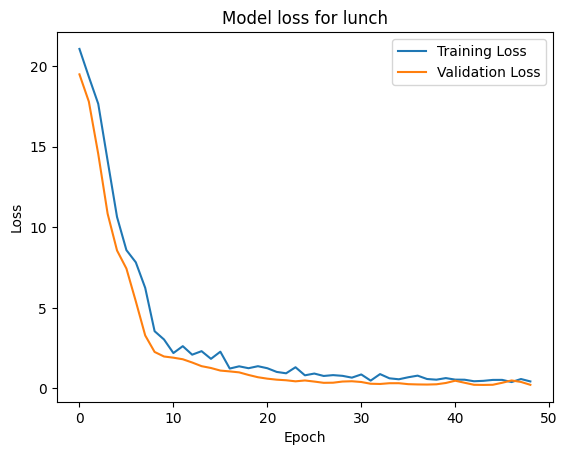

Metrics for lunch:
MAE : 0.3193599821575104
RMSE : 0.41736751363388797


In [30]:
meal_time='lunch'
model = create_model(X_train_dict[meal_time], y_train_dict[meal_time])
print_model_summary(model, meal_time)
history = train_model(model, X_train_dict[meal_time], y_train_dict[meal_time], X_test_dict[meal_time], y_test_dict[meal_time])
mae, rmse = evaluate_and_plot_model(model, history, X_test_dict[meal_time], y_test_dict[meal_time], meal_time)

In [ ]:
# Model Summary for lunch
# Model: "sequential_3"
# _________________________________________________________________
#  Layer (type)                Output Shape              Param #   
# =================================================================
#  dense_9 (Dense)             (None, 50)                1450      
                                                                 
#  dropout_3 (Dropout)         (None, 50)                0         
                                                                 
#  dense_10 (Dense)            (None, 8)                 408       
                                                                 
#  dense_11 (Dense)            (None, 175)               1575      
                                                                 
# =================================================================
# Total params: 3,433
# Trainable params: 3,433
# Non-trainable params: 0
# _________________________________________________________________
# Epoch 1/1000
# 2/2 [==============================] - 1s 260ms/step - loss: 21.0596 - val_loss: 19.4820
# Epoch 2/1000
# 2/2 [==============================] - 0s 46ms/step - loss: 19.3286 - val_loss: 17.7920
# Epoch 3/1000
# 2/2 [==============================] - 0s 42ms/step - loss: 17.6543 - val_loss: 14.5455
# Epoch 4/1000
# 2/2 [==============================] - 0s 45ms/step - loss: 14.1267 - val_loss: 10.8363
# Epoch 5/1000
# 2/2 [==============================] - 0s 71ms/step - loss: 10.6361 - val_loss: 8.5583
# Epoch 6/1000
# 2/2 [==============================] - 0s 43ms/step - loss: 8.5785 - val_loss: 7.4349
# Epoch 7/1000
# 2/2 [==============================] - 0s 68ms/step - loss: 7.8220 - val_loss: 5.4032
# Epoch 8/1000
# 2/2 [==============================] - 0s 55ms/step - loss: 6.2380 - val_loss: 3.2875
# Epoch 9/1000
# 2/2 [==============================] - 0s 40ms/step - loss: 3.5509 - val_loss: 2.2632
# Epoch 10/1000
# 2/2 [==============================] - 0s 61ms/step - loss: 3.0372 - val_loss: 1.9812
# Epoch 11/1000
# 2/2 [==============================] - 0s 54ms/step - loss: 2.1949 - val_loss: 1.9078
# Epoch 12/1000
# 2/2 [==============================] - 0s 59ms/step - loss: 2.6219 - val_loss: 1.8103
# Epoch 13/1000
# 2/2 [==============================] - 0s 76ms/step - loss: 2.0940 - val_loss: 1.6083
# Epoch 14/1000
# 2/2 [==============================] - 0s 64ms/step - loss: 2.3117 - val_loss: 1.3815
# Epoch 15/1000
# 2/2 [==============================] - 0s 48ms/step - loss: 1.8358 - val_loss: 1.2677
# Epoch 16/1000
# 2/2 [==============================] - 0s 36ms/step - loss: 2.2789 - val_loss: 1.1083
# Epoch 17/1000
# 2/2 [==============================] - 0s 31ms/step - loss: 1.2328 - val_loss: 1.0565
# Epoch 18/1000
# 2/2 [==============================] - 0s 32ms/step - loss: 1.3720 - val_loss: 0.9966
# Epoch 19/1000
# 2/2 [==============================] - 0s 31ms/step - loss: 1.2543 - val_loss: 0.8357
# Epoch 20/1000
# 2/2 [==============================] - 0s 33ms/step - loss: 1.3794 - val_loss: 0.6955
# Epoch 21/1000
# 2/2 [==============================] - 0s 34ms/step - loss: 1.2537 - val_loss: 0.6061
# Epoch 22/1000
# 2/2 [==============================] - 0s 39ms/step - loss: 1.0241 - val_loss: 0.5436
# Epoch 23/1000
# 2/2 [==============================] - 0s 42ms/step - loss: 0.9395 - val_loss: 0.5067
# Epoch 24/1000
# 2/2 [==============================] - 0s 58ms/step - loss: 1.3143 - val_loss: 0.4412
# Epoch 25/1000
# 2/2 [==============================] - 0s 38ms/step - loss: 0.8138 - val_loss: 0.4942
# Epoch 26/1000
# 2/2 [==============================] - 0s 44ms/step - loss: 0.9232 - val_loss: 0.4261
# Epoch 27/1000
# 2/2 [==============================] - 0s 38ms/step - loss: 0.7740 - val_loss: 0.3484
# Epoch 28/1000
# 2/2 [==============================] - 0s 39ms/step - loss: 0.8261 - val_loss: 0.3556
# Epoch 29/1000
# 2/2 [==============================] - 0s 40ms/step - loss: 0.7819 - val_loss: 0.4279
# Epoch 30/1000
# 2/2 [==============================] - 0s 58ms/step - loss: 0.6697 - val_loss: 0.4456
# Epoch 31/1000
# 2/2 [==============================] - 0s 40ms/step - loss: 0.8677 - val_loss: 0.3993
# Epoch 32/1000
# 2/2 [==============================] - 0s 40ms/step - loss: 0.4855 - val_loss: 0.2909
# Epoch 33/1000
# 2/2 [==============================] - 0s 40ms/step - loss: 0.8894 - val_loss: 0.2767
# Epoch 34/1000
# 2/2 [==============================] - 0s 42ms/step - loss: 0.6275 - val_loss: 0.3236
# Epoch 35/1000
# 2/2 [==============================] - 0s 37ms/step - loss: 0.5681 - val_loss: 0.3245
# Epoch 36/1000
# 2/2 [==============================] - 0s 35ms/step - loss: 0.6930 - val_loss: 0.2650
# Epoch 37/1000
# 2/2 [==============================] - 0s 43ms/step - loss: 0.7936 - val_loss: 0.2481
# Epoch 38/1000
# 2/2 [==============================] - 0s 39ms/step - loss: 0.5848 - val_loss: 0.2409
# Epoch 39/1000
# 2/2 [==============================] - 0s 37ms/step - loss: 0.5435 - val_loss: 0.2569
# Epoch 40/1000
# 2/2 [==============================] - 0s 38ms/step - loss: 0.6417 - val_loss: 0.3379
# Epoch 41/1000
# 2/2 [==============================] - 0s 38ms/step - loss: 0.5469 - val_loss: 0.4793
# Epoch 42/1000
# 2/2 [==============================] - 0s 37ms/step - loss: 0.5407 - val_loss: 0.3525
# Epoch 43/1000
# 2/2 [==============================] - 0s 38ms/step - loss: 0.4462 - val_loss: 0.2261
# Epoch 44/1000
# 2/2 [==============================] - 0s 40ms/step - loss: 0.4712 - val_loss: 0.2180
# Epoch 45/1000
# 2/2 [==============================] - 0s 39ms/step - loss: 0.5286 - val_loss: 0.2271
# Epoch 46/1000
# 2/2 [==============================] - 0s 42ms/step - loss: 0.5305 - val_loss: 0.3510
# Epoch 47/1000
# 2/2 [==============================] - 0s 39ms/step - loss: 0.3957 - val_loss: 0.4947
# Epoch 48/1000
# 2/2 [==============================] - 0s 45ms/step - loss: 0.5838 - val_loss: 0.4034
# Epoch 49/1000
# 2/2 [==============================] - 0s 38ms/step - loss: 0.4349 - val_loss: 0.2244
# 1/1 [==============================] - 0s 67ms/step

# Metrics for lunch:
# MAE : 0.3193599821575104
# RMSE : 0.41736751363388797

In [31]:
# Save the model
save_path = f"model_{meal_time}.h5"
model.save(save_path)

Model Summary for dinner
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 50)                1450      
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense_13 (Dense)            (None, 8)                 408       
                                                                 
 dense_14 (Dense)            (None, 175)               1575      
                                                                 
Total params: 3,433
Trainable params: 3,433
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
2/2 [==============================] - 1s 195ms/step - loss: 21.0722 - val_loss: 19.8291
Epoch 2/1000
2/2 [==============================] - 0s 31

1/1 [==============================] - 0s 103ms/step


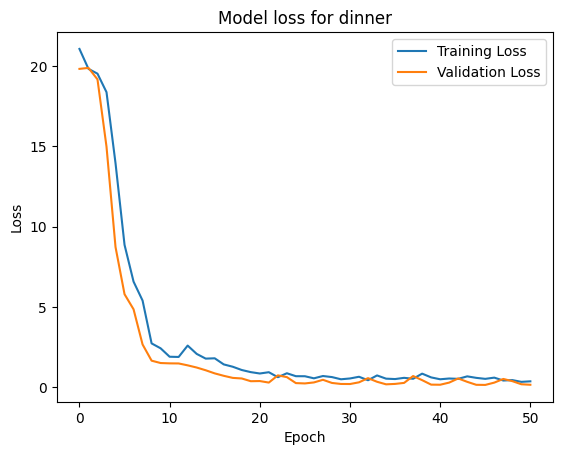

Metrics for dinner:
MAE : 0.2578443056772626
RMSE : 0.31228400615880025


In [32]:
meal_time='dinner'
model = create_model(X_train_dict[meal_time], y_train_dict[meal_time])
print_model_summary(model, meal_time)
history = train_model(model, X_train_dict[meal_time], y_train_dict[meal_time], X_test_dict[meal_time], y_test_dict[meal_time])
mae, rmse = evaluate_and_plot_model(model, history, X_test_dict[meal_time], y_test_dict[meal_time], meal_time)

In [ ]:
# Model Summary for dinner
# Model: "sequential_4"
# _________________________________________________________________
#  Layer (type)                Output Shape              Param #   
# =================================================================
#  dense_12 (Dense)            (None, 50)                1450      
                                                                 
#  dropout_4 (Dropout)         (None, 50)                0         
                                                                 
#  dense_13 (Dense)            (None, 8)                 408       
                                                                 
#  dense_14 (Dense)            (None, 175)               1575      
                                                                 
# =================================================================
# Total params: 3,433
# Trainable params: 3,433
# Non-trainable params: 0
# _________________________________________________________________
# Epoch 1/1000
# 2/2 [==============================] - 1s 195ms/step - loss: 21.0722 - val_loss: 19.8291
# Epoch 2/1000
# 2/2 [==============================] - 0s 31ms/step - loss: 19.8292 - val_loss: 19.8899
# Epoch 3/1000
# 2/2 [==============================] - 0s 33ms/step - loss: 19.5303 - val_loss: 19.1746
# Epoch 4/1000
# 2/2 [==============================] - 0s 33ms/step - loss: 18.3779 - val_loss: 14.9808
# Epoch 5/1000
# 2/2 [==============================] - 0s 33ms/step - loss: 13.9495 - val_loss: 8.7264
# Epoch 6/1000
# 2/2 [==============================] - 0s 37ms/step - loss: 8.8627 - val_loss: 5.7875
# Epoch 7/1000
# 2/2 [==============================] - 0s 32ms/step - loss: 6.5718 - val_loss: 4.8478
# Epoch 8/1000
# 2/2 [==============================] - 0s 32ms/step - loss: 5.3920 - val_loss: 2.6563
# Epoch 9/1000
# 2/2 [==============================] - 0s 31ms/step - loss: 2.7233 - val_loss: 1.6465
# Epoch 10/1000
# 2/2 [==============================] - 0s 31ms/step - loss: 2.4171 - val_loss: 1.4996
# Epoch 11/1000
# 2/2 [==============================] - 0s 33ms/step - loss: 1.8916 - val_loss: 1.4790
# Epoch 12/1000
# 2/2 [==============================] - 0s 35ms/step - loss: 1.8778 - val_loss: 1.4737
# Epoch 13/1000
# 2/2 [==============================] - 0s 40ms/step - loss: 2.5870 - val_loss: 1.3549
# Epoch 14/1000
# 2/2 [==============================] - 0s 35ms/step - loss: 2.0686 - val_loss: 1.2190
# Epoch 15/1000
# 2/2 [==============================] - 0s 34ms/step - loss: 1.7749 - val_loss: 1.0486
# Epoch 16/1000
# 2/2 [==============================] - 0s 34ms/step - loss: 1.7940 - val_loss: 0.8546
# Epoch 17/1000
# 2/2 [==============================] - 0s 34ms/step - loss: 1.4138 - val_loss: 0.7033
# Epoch 18/1000
# 2/2 [==============================] - 0s 37ms/step - loss: 1.2684 - val_loss: 0.5737
# Epoch 19/1000
# 2/2 [==============================] - 0s 43ms/step - loss: 1.0643 - val_loss: 0.5371
# Epoch 20/1000
# 2/2 [==============================] - 0s 35ms/step - loss: 0.9326 - val_loss: 0.3668
# Epoch 21/1000
# 2/2 [==============================] - 0s 44ms/step - loss: 0.8472 - val_loss: 0.3762
# Epoch 22/1000
# 2/2 [==============================] - 0s 39ms/step - loss: 0.9276 - val_loss: 0.2813
# Epoch 23/1000
# 2/2 [==============================] - 0s 34ms/step - loss: 0.6157 - val_loss: 0.7315
# Epoch 24/1000
# 2/2 [==============================] - 0s 41ms/step - loss: 0.8627 - val_loss: 0.6211
# Epoch 25/1000
# 2/2 [==============================] - 0s 36ms/step - loss: 0.6793 - val_loss: 0.2488
# Epoch 26/1000
# 2/2 [==============================] - 0s 36ms/step - loss: 0.6765 - val_loss: 0.2282
# Epoch 27/1000
# 2/2 [==============================] - 0s 35ms/step - loss: 0.5467 - val_loss: 0.2906
# Epoch 28/1000
# 2/2 [==============================] - 0s 35ms/step - loss: 0.6905 - val_loss: 0.4549
# Epoch 29/1000
# 2/2 [==============================] - 0s 36ms/step - loss: 0.6241 - val_loss: 0.2587
# Epoch 30/1000
# 2/2 [==============================] - 0s 36ms/step - loss: 0.4873 - val_loss: 0.1956
# Epoch 31/1000
# 2/2 [==============================] - 0s 36ms/step - loss: 0.5378 - val_loss: 0.1915
# Epoch 32/1000
# 2/2 [==============================] - 0s 42ms/step - loss: 0.6437 - val_loss: 0.2974
# Epoch 33/1000
# 2/2 [==============================] - 0s 36ms/step - loss: 0.4268 - val_loss: 0.5582
# Epoch 34/1000
# 2/2 [==============================] - 0s 39ms/step - loss: 0.7270 - val_loss: 0.3315
# Epoch 35/1000
# 2/2 [==============================] - 0s 47ms/step - loss: 0.5258 - val_loss: 0.1724
# Epoch 36/1000
# 2/2 [==============================] - 0s 32ms/step - loss: 0.5009 - val_loss: 0.1983
# Epoch 37/1000
# 2/2 [==============================] - 0s 30ms/step - loss: 0.5770 - val_loss: 0.2619
# Epoch 38/1000
# 2/2 [==============================] - 0s 35ms/step - loss: 0.5181 - val_loss: 0.6895
# Epoch 39/1000
# 2/2 [==============================] - 0s 31ms/step - loss: 0.8386 - val_loss: 0.4329
# Epoch 40/1000
# 2/2 [==============================] - 0s 44ms/step - loss: 0.6037 - val_loss: 0.1533
# Epoch 41/1000
# 2/2 [==============================] - 0s 33ms/step - loss: 0.4876 - val_loss: 0.1471
# Epoch 42/1000
# 2/2 [==============================] - 0s 35ms/step - loss: 0.5351 - val_loss: 0.2804
# Epoch 43/1000
# 2/2 [==============================] - 0s 31ms/step - loss: 0.5141 - val_loss: 0.5393
# Epoch 44/1000
# 2/2 [==============================] - 0s 39ms/step - loss: 0.6691 - val_loss: 0.3273
# Epoch 45/1000
# 2/2 [==============================] - 0s 32ms/step - loss: 0.5756 - val_loss: 0.1428
# Epoch 46/1000
# 2/2 [==============================] - 0s 31ms/step - loss: 0.5132 - val_loss: 0.1355
# Epoch 47/1000
# 2/2 [==============================] - 0s 31ms/step - loss: 0.5898 - val_loss: 0.2794
# Epoch 48/1000
# 2/2 [==============================] - 0s 35ms/step - loss: 0.4094 - val_loss: 0.5077
# Epoch 49/1000
# 2/2 [==============================] - 0s 35ms/step - loss: 0.4366 - val_loss: 0.3711
# Epoch 50/1000
# 2/2 [==============================] - 0s 34ms/step - loss: 0.3267 - val_loss: 0.1771
# Epoch 51/1000
# 2/2 [==============================] - 0s 37ms/step - loss: 0.3593 - val_loss: 0.1456
# WARNING:tensorflow:5 out of the last 5 calls to <function Model.make_predict_function.<locals>.predict_function at 0x7fcbe85fc280> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
# 1/1 [==============================] - 0s 103ms/step

# Metrics for dinner:
# MAE : 0.2578443056772626
# RMSE : 0.31228400615880025

In [33]:
# Save the model
save_path = f"model_{meal_time}.h5"
model.save(save_path)

Model Summary for snack
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 50)                1450      
                                                                 
 dropout_6 (Dropout)         (None, 50)                0         
                                                                 
 dense_19 (Dense)            (None, 8)                 408       
                                                                 
 dense_20 (Dense)            (None, 175)               1575      
                                                                 
Total params: 3,433
Trainable params: 3,433
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
2/2 [==============================] - 1s 257ms/step - loss: 19.6372 - val_loss: 16.2495
Epoch 2/1000
2/2 [==============================] - 0s 42m

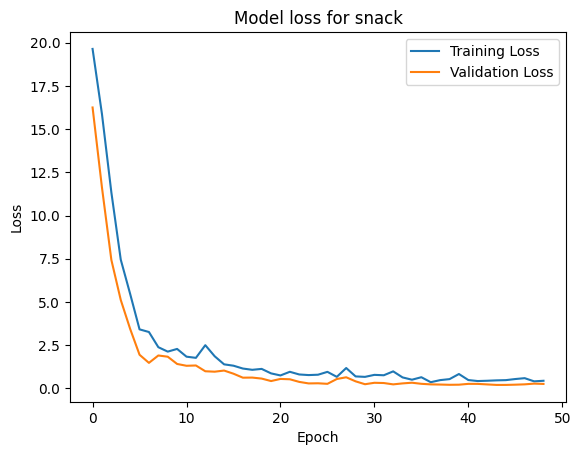

Metrics for snack:
MAE : 0.37361077492729067
RMSE : 0.4574608510656059


In [35]:
meal_time='snack'
model = create_model(X_train_dict[meal_time], y_train_dict[meal_time])
print_model_summary(model, meal_time)
history = train_model(model, X_train_dict[meal_time], y_train_dict[meal_time], X_test_dict[meal_time], y_test_dict[meal_time])
mae, rmse = evaluate_and_plot_model(model, history, X_test_dict[meal_time], y_test_dict[meal_time], meal_time)

In [ ]:
# Model Summary for snack
# Model: "sequential_6"
# _________________________________________________________________
#  Layer (type)                Output Shape              Param #   
# =================================================================
#  dense_18 (Dense)            (None, 50)                1450      
                                                                 
#  dropout_6 (Dropout)         (None, 50)                0         
                                                                 
#  dense_19 (Dense)            (None, 8)                 408       
                                                                 
#  dense_20 (Dense)            (None, 175)               1575      
                                                                 
# =================================================================
# Total params: 3,433
# Trainable params: 3,433
# Non-trainable params: 0
# _________________________________________________________________
# Epoch 1/1000
# 2/2 [==============================] - 1s 257ms/step - loss: 19.6372 - val_loss: 16.2495
# Epoch 2/1000
# 2/2 [==============================] - 0s 42ms/step - loss: 15.8669 - val_loss: 11.6168
# Epoch 3/1000
# 2/2 [==============================] - 0s 43ms/step - loss: 11.3375 - val_loss: 7.4306
# Epoch 4/1000
# 2/2 [==============================] - 0s 41ms/step - loss: 7.4467 - val_loss: 5.1147
# Epoch 5/1000
# 2/2 [==============================] - 0s 43ms/step - loss: 5.4639 - val_loss: 3.4396
# Epoch 6/1000
# 2/2 [==============================] - 0s 54ms/step - loss: 3.4127 - val_loss: 1.9440
# Epoch 7/1000
# 2/2 [==============================] - 0s 43ms/step - loss: 3.2596 - val_loss: 1.4740
# Epoch 8/1000
# 2/2 [==============================] - 0s 72ms/step - loss: 2.3816 - val_loss: 1.9013
# Epoch 9/1000
# 2/2 [==============================] - 0s 41ms/step - loss: 2.1249 - val_loss: 1.8309
# Epoch 10/1000
# 2/2 [==============================] - 0s 46ms/step - loss: 2.2804 - val_loss: 1.4112
# Epoch 11/1000
# 2/2 [==============================] - 0s 72ms/step - loss: 1.8323 - val_loss: 1.3060
# Epoch 12/1000
# 2/2 [==============================] - 0s 71ms/step - loss: 1.7647 - val_loss: 1.3229
# Epoch 13/1000
# 2/2 [==============================] - 0s 56ms/step - loss: 2.4977 - val_loss: 0.9888
# Epoch 14/1000
# 2/2 [==============================] - 0s 65ms/step - loss: 1.8560 - val_loss: 0.9641
# Epoch 15/1000
# 2/2 [==============================] - 0s 53ms/step - loss: 1.3892 - val_loss: 1.0297
# Epoch 16/1000
# 2/2 [==============================] - 0s 60ms/step - loss: 1.3103 - val_loss: 0.8474
# Epoch 17/1000
# 2/2 [==============================] - 0s 66ms/step - loss: 1.1461 - val_loss: 0.6173
# Epoch 18/1000
# 2/2 [==============================] - 0s 59ms/step - loss: 1.0729 - val_loss: 0.6232
# Epoch 19/1000
# 2/2 [==============================] - 0s 48ms/step - loss: 1.1253 - val_loss: 0.5652
# Epoch 20/1000
# 2/2 [==============================] - 0s 46ms/step - loss: 0.8660 - val_loss: 0.4223
# Epoch 21/1000
# 2/2 [==============================] - 0s 65ms/step - loss: 0.7468 - val_loss: 0.5450
# Epoch 22/1000
# 2/2 [==============================] - 0s 44ms/step - loss: 0.9578 - val_loss: 0.5250
# Epoch 23/1000
# 2/2 [==============================] - 0s 47ms/step - loss: 0.8034 - val_loss: 0.3735
# Epoch 24/1000
# 2/2 [==============================] - 0s 44ms/step - loss: 0.7681 - val_loss: 0.2853
# Epoch 25/1000
# 2/2 [==============================] - 0s 44ms/step - loss: 0.7887 - val_loss: 0.2933
# Epoch 26/1000
# 2/2 [==============================] - 0s 39ms/step - loss: 0.9545 - val_loss: 0.2614
# Epoch 27/1000
# 2/2 [==============================] - 0s 29ms/step - loss: 0.6653 - val_loss: 0.5405
# Epoch 28/1000
# 2/2 [==============================] - 0s 32ms/step - loss: 1.1759 - val_loss: 0.6402
# Epoch 29/1000
# 2/2 [==============================] - 0s 36ms/step - loss: 0.6910 - val_loss: 0.4058
# Epoch 30/1000
# 2/2 [==============================] - 0s 42ms/step - loss: 0.6644 - val_loss: 0.2386
# Epoch 31/1000
# 2/2 [==============================] - 0s 38ms/step - loss: 0.7806 - val_loss: 0.3220
# Epoch 32/1000
# 2/2 [==============================] - 0s 31ms/step - loss: 0.7571 - val_loss: 0.3082
# Epoch 33/1000
# 2/2 [==============================] - 0s 29ms/step - loss: 0.9824 - val_loss: 0.2304
# Epoch 34/1000
# 2/2 [==============================] - 0s 34ms/step - loss: 0.6328 - val_loss: 0.2864
# Epoch 35/1000
# 2/2 [==============================] - 0s 31ms/step - loss: 0.5006 - val_loss: 0.3255
# Epoch 36/1000
# 2/2 [==============================] - 0s 31ms/step - loss: 0.6435 - val_loss: 0.2626
# Epoch 37/1000
# 2/2 [==============================] - 0s 31ms/step - loss: 0.3562 - val_loss: 0.2300
# Epoch 38/1000
# 2/2 [==============================] - 0s 35ms/step - loss: 0.4762 - val_loss: 0.2201
# Epoch 39/1000
# 2/2 [==============================] - 0s 31ms/step - loss: 0.5343 - val_loss: 0.2056
# Epoch 40/1000
# 2/2 [==============================] - 0s 30ms/step - loss: 0.8293 - val_loss: 0.2118
# Epoch 41/1000
# 2/2 [==============================] - 0s 30ms/step - loss: 0.4804 - val_loss: 0.2599
# Epoch 42/1000
# 2/2 [==============================] - 0s 35ms/step - loss: 0.4226 - val_loss: 0.2580
# Epoch 43/1000
# 2/2 [==============================] - 0s 34ms/step - loss: 0.4396 - val_loss: 0.2279
# Epoch 44/1000
# 2/2 [==============================] - 0s 32ms/step - loss: 0.4622 - val_loss: 0.1984
# Epoch 45/1000
# 2/2 [==============================] - 0s 31ms/step - loss: 0.4757 - val_loss: 0.1992
# Epoch 46/1000
# 2/2 [==============================] - 0s 36ms/step - loss: 0.5392 - val_loss: 0.2127
# Epoch 47/1000
# 2/2 [==============================] - 0s 35ms/step - loss: 0.5893 - val_loss: 0.2318
# Epoch 48/1000
# 2/2 [==============================] - 0s 34ms/step - loss: 0.4056 - val_loss: 0.2737
# Epoch 49/1000
# 2/2 [==============================] - 0s 37ms/step - loss: 0.4382 - val_loss: 0.2558
# 1/1 [==============================] - 0s 60ms/step

# Metrics for snack:
# MAE : 0.37361077492729067
# RMSE : 0.4574608510656059

In [36]:
# Save the model
save_path = f"model_{meal_time}.h5"
model.save(save_path)

# Save and Convert to Tensorflow.js

In [1]:
# !pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: flax
    Found existing installation: flax 0.6.9
    Uninstalling flax-0.6.9:
      Successfully uninstalled flax-0.6.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.13.5 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
xar

In [37]:
import tensorflowjs as tfjs

# Define the save path for each model
save_path_breakfast = "model_breakfast.h5"
save_path_dinner = "model_dinner.h5"
save_path_lunch = "model_lunch.h5"
save_path_snack = "model_snack.h5"

# Load the Keras models
model_breakfast = tf.keras.models.load_model(save_path_breakfast)
model_dinner = tf.keras.models.load_model(save_path_dinner)
model_lunch = tf.keras.models.load_model(save_path_lunch)
model_snack = tf.keras.models.load_model(save_path_snack)

# Convert and save the models to TensorFlow.js format
output_path = "/content/drive/MyDrive/capstone/ML/model/"
tfjs.converters.save_keras_model(model_breakfast, output_path + "output_breakfast")
tfjs.converters.save_keras_model(model_dinner, output_path + "output_dinner")
tfjs.converters.save_keras_model(model_lunch, output_path + "output_lunch")
tfjs.converters.save_keras_model(model_snack, output_path + "output_snack")